In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',None)

### Load the data

In [3]:
df = pd.read_csv('processed_df.csv', index_col=0)
df.head()

,Brand,Model,Case Material,Strap Material,Movement Type,Water Resistance,Case Diameter (mm),Case Thickness (mm),Band Width (mm),Dial Color,Crystal Material,Complications,Power Reserve,Price (USD)
0,Rolex,Submariner,Stainless Steel,Stainless Steel,Automatic,300.0,40.0,13.00,20.0,Black,Sapphire,Date,48.0,9500.0
1,Omega,Seamaster,Titanium,Rubber,Automatic,600.0,43.5,14.47,21.0,Blue,Sapphire,Date,60.0,5800.0
2,Tag Heuer,Carrera,Stainless Steel,Leather,Automatic,100.0,41.0,13.00,20.0,White,Sapphire,Chronograph,42.0,4200.0
3,Breitling,Navitimer,Stainless Steel,Stainless Steel,Automatic,30.0,43.0,14.25,22.0,Black,Sapphire,Chronograph,70.0,7900.0
4,Cartier,Tank Solo,Stainless Steel,Leather,Quartz,30.0,31.0,6.05,20.0,Silver,Sapphire,NaN,NaN,2800.0


In [4]:
catcols = list(df.select_dtypes(include=['object']).columns)
numcols = list(df.select_dtypes(include=['float64','int']).columns)

### Categorical data (Unique counts)

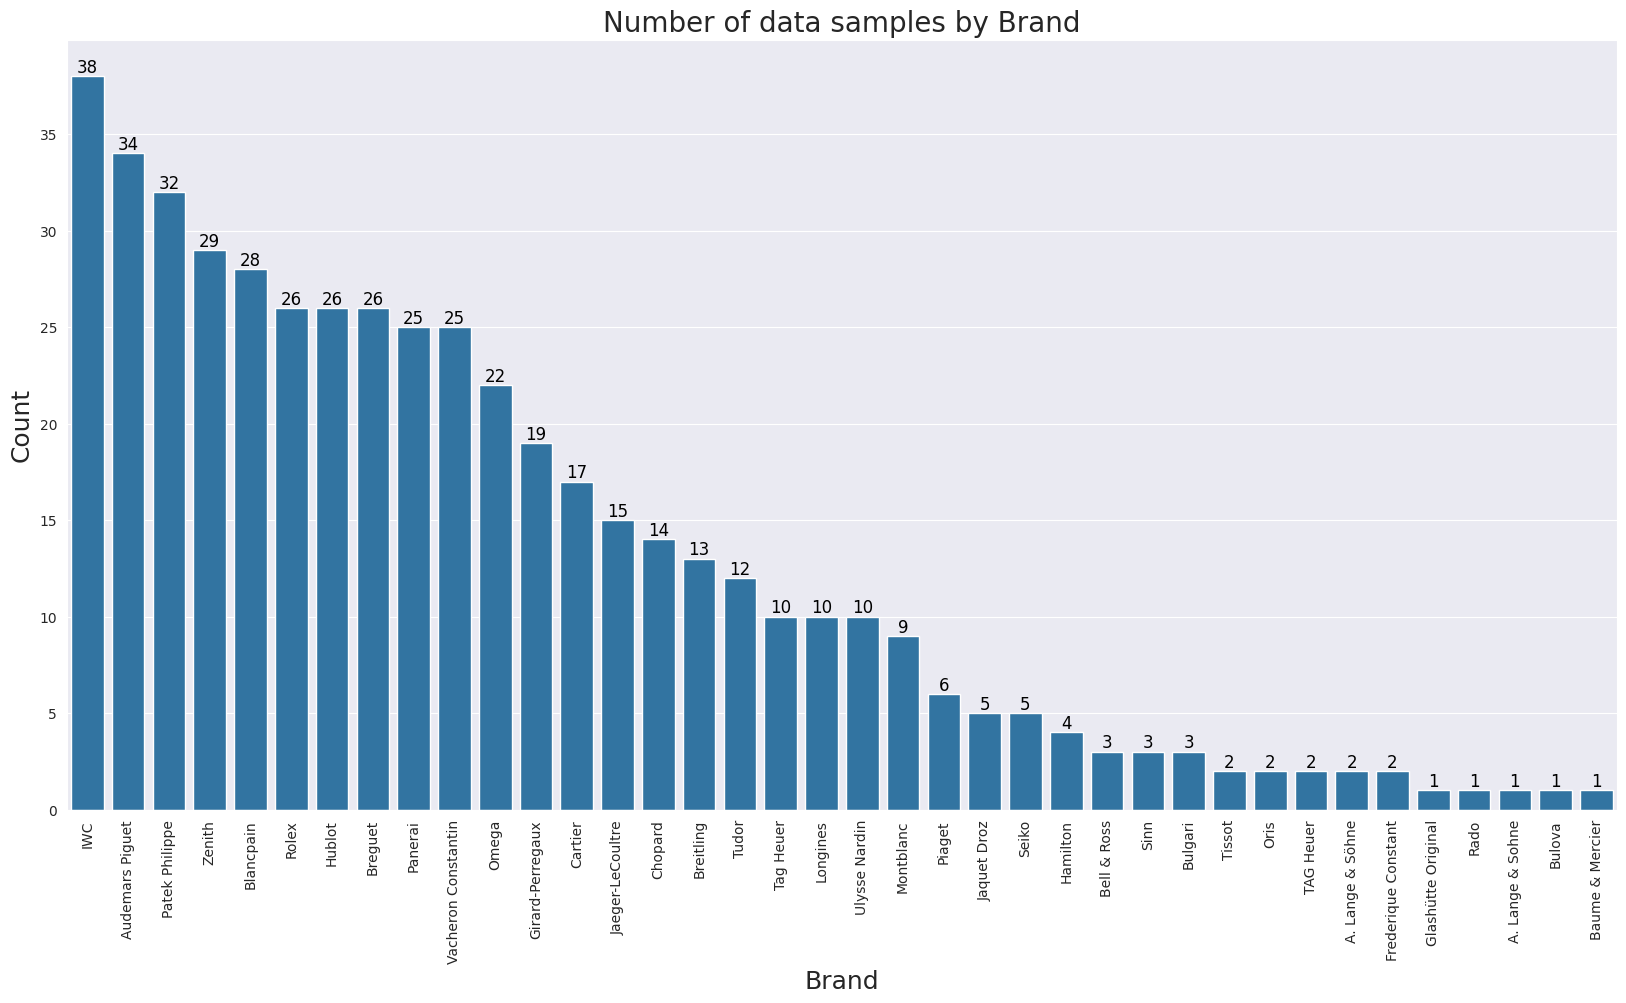

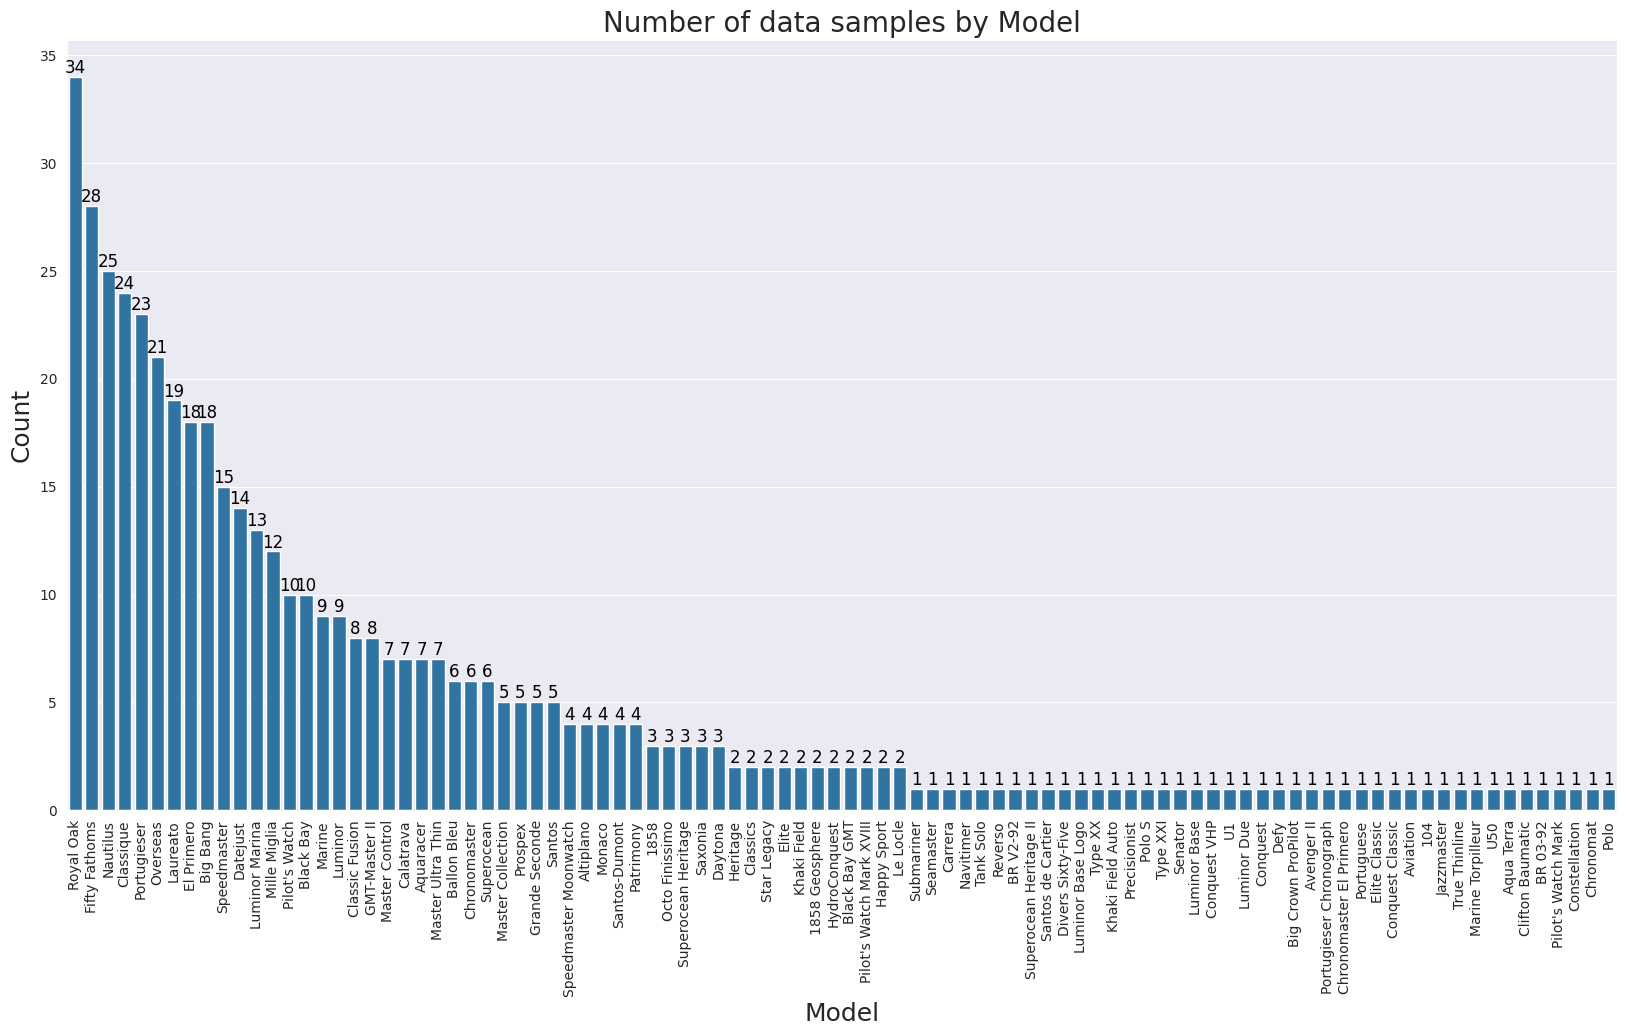

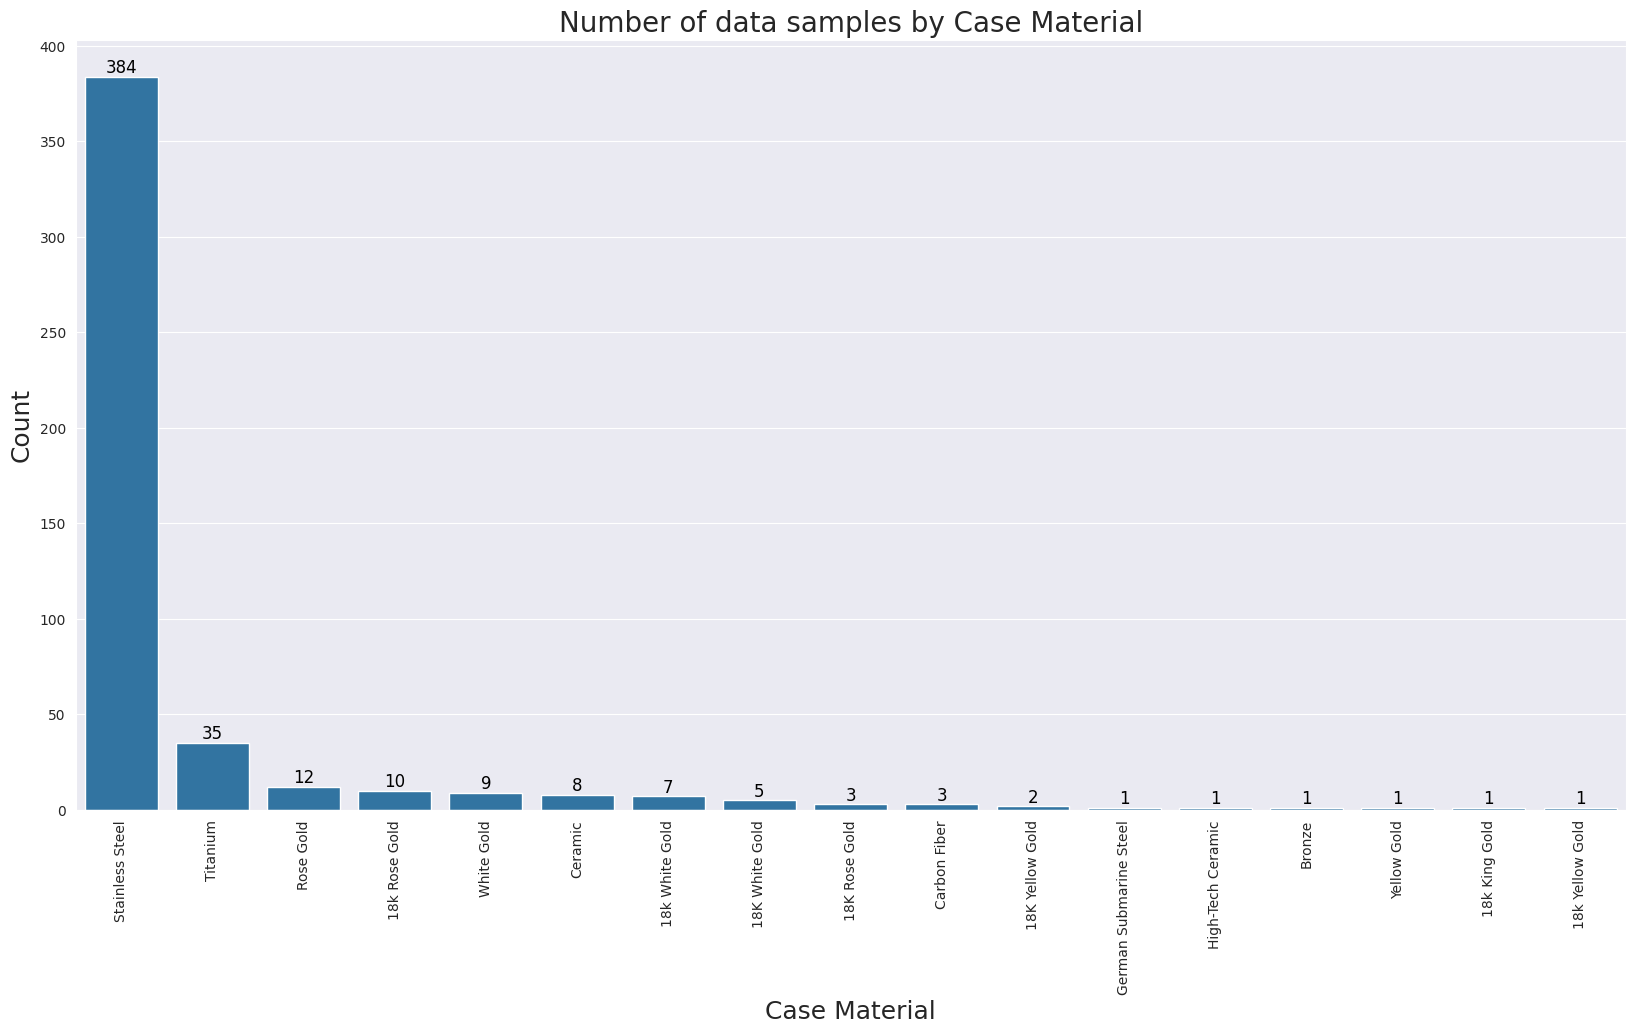

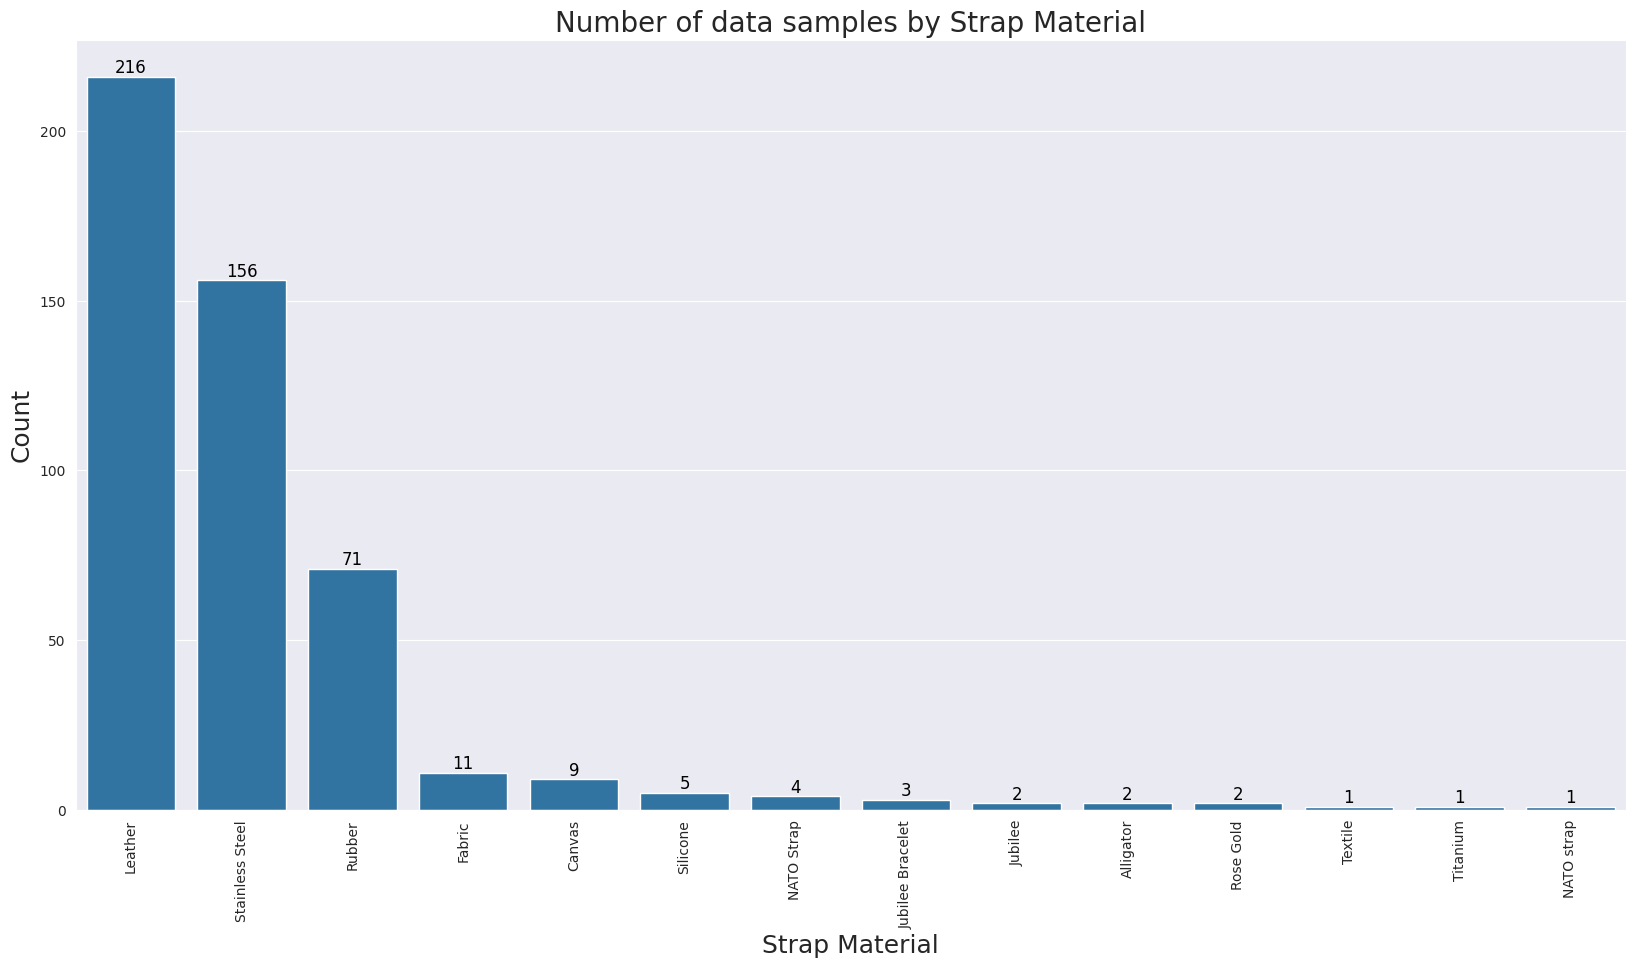

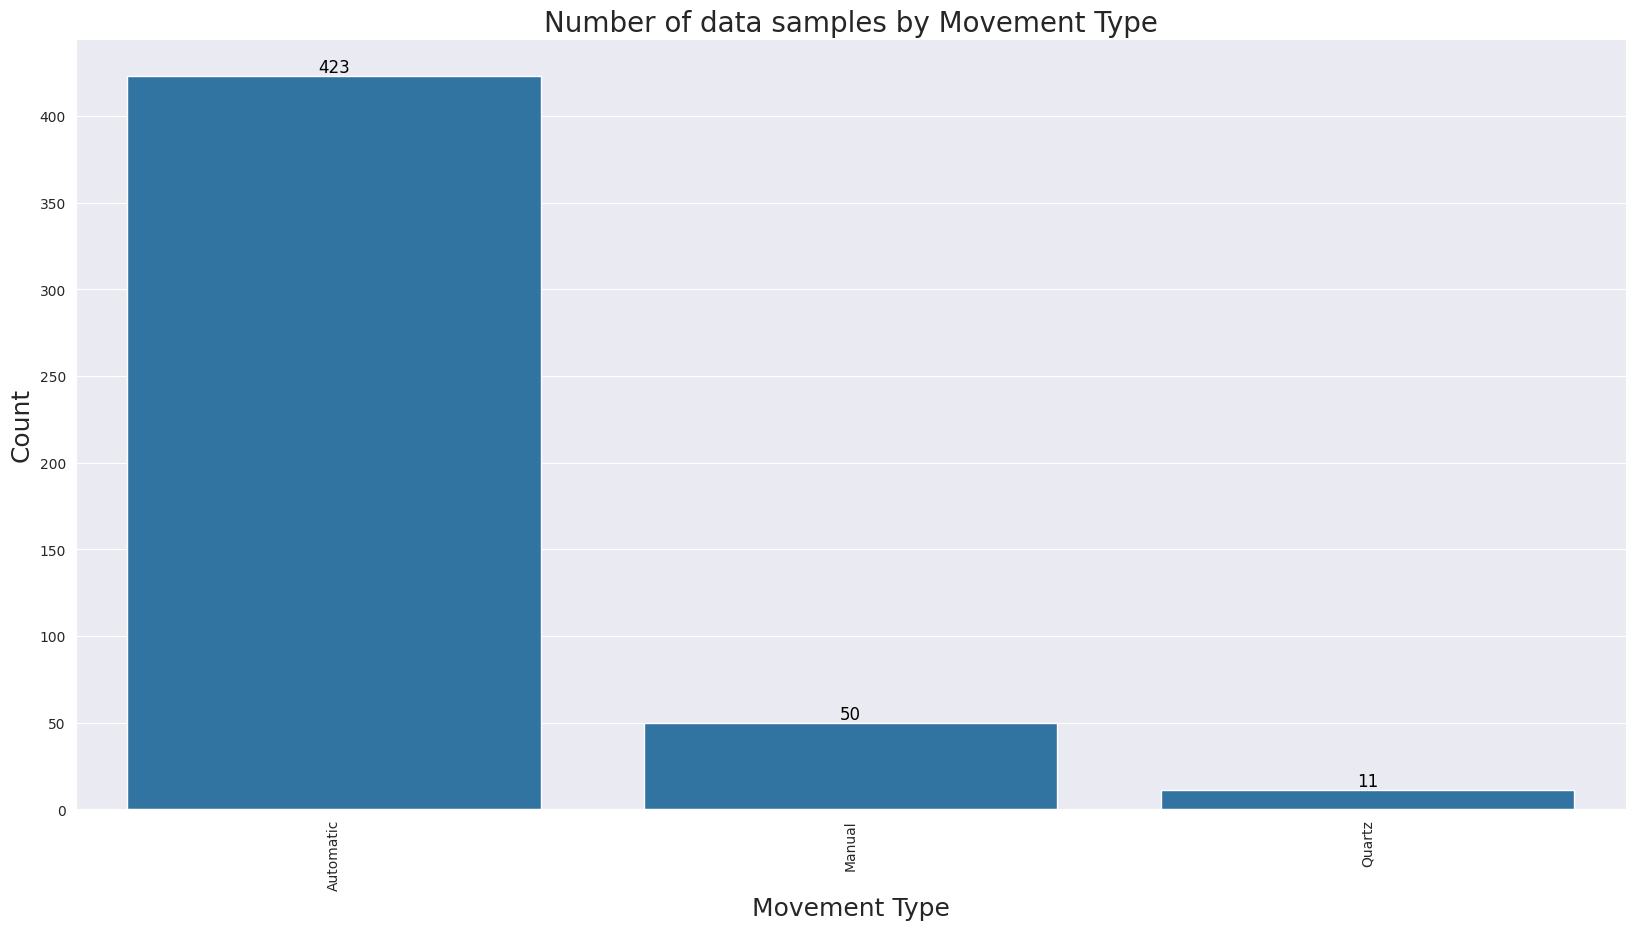

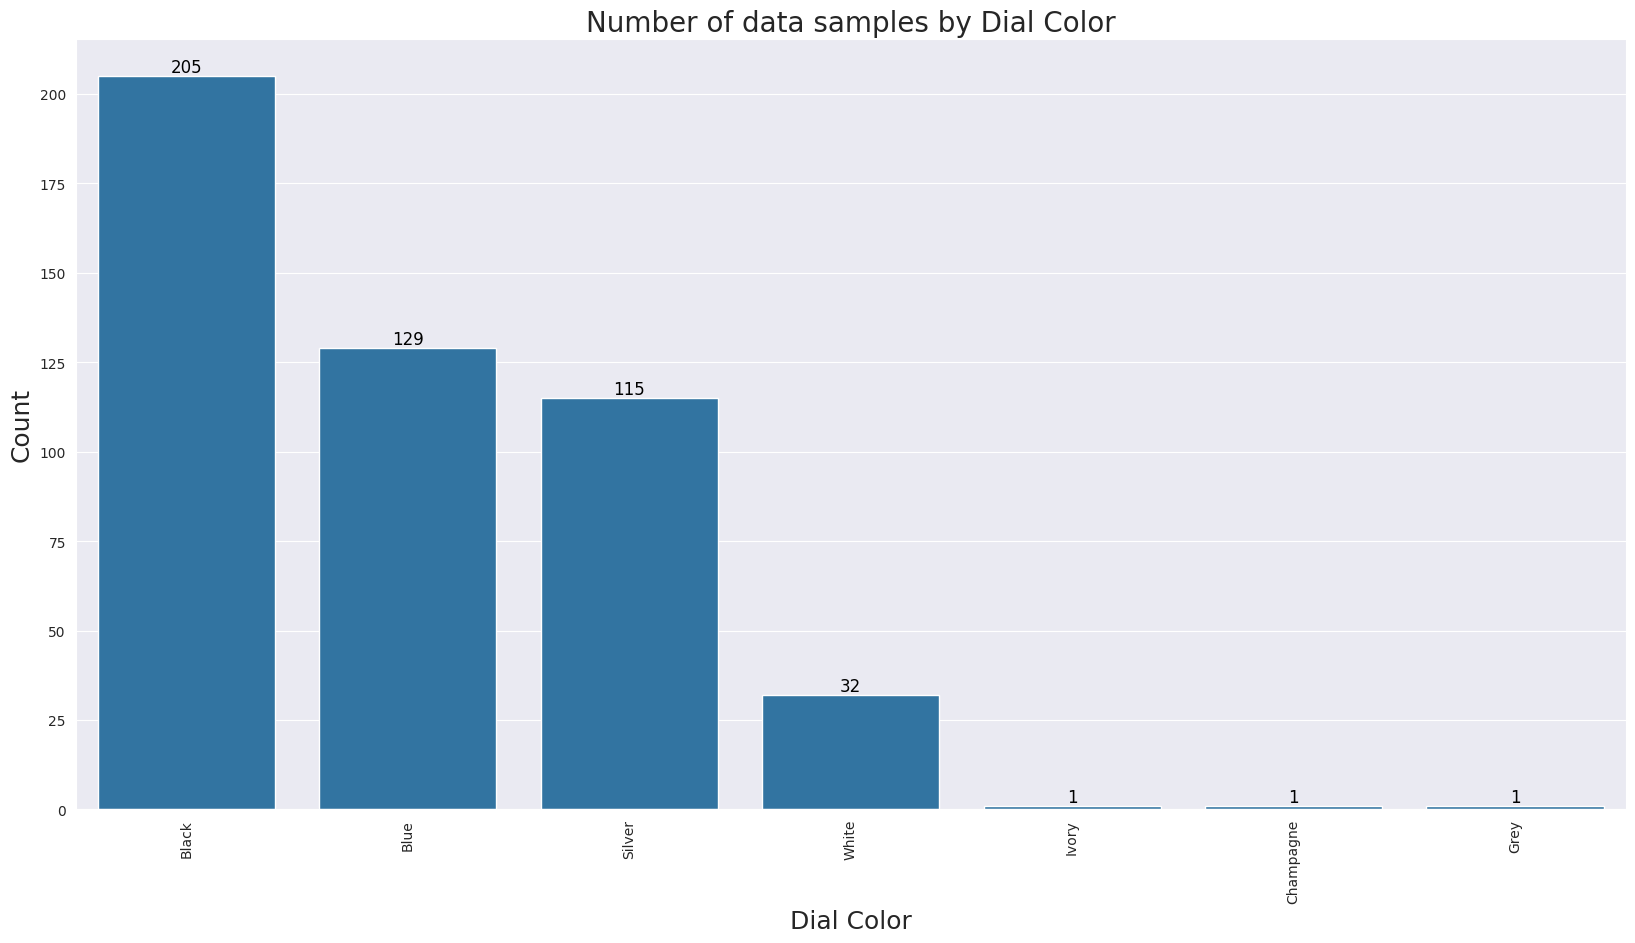

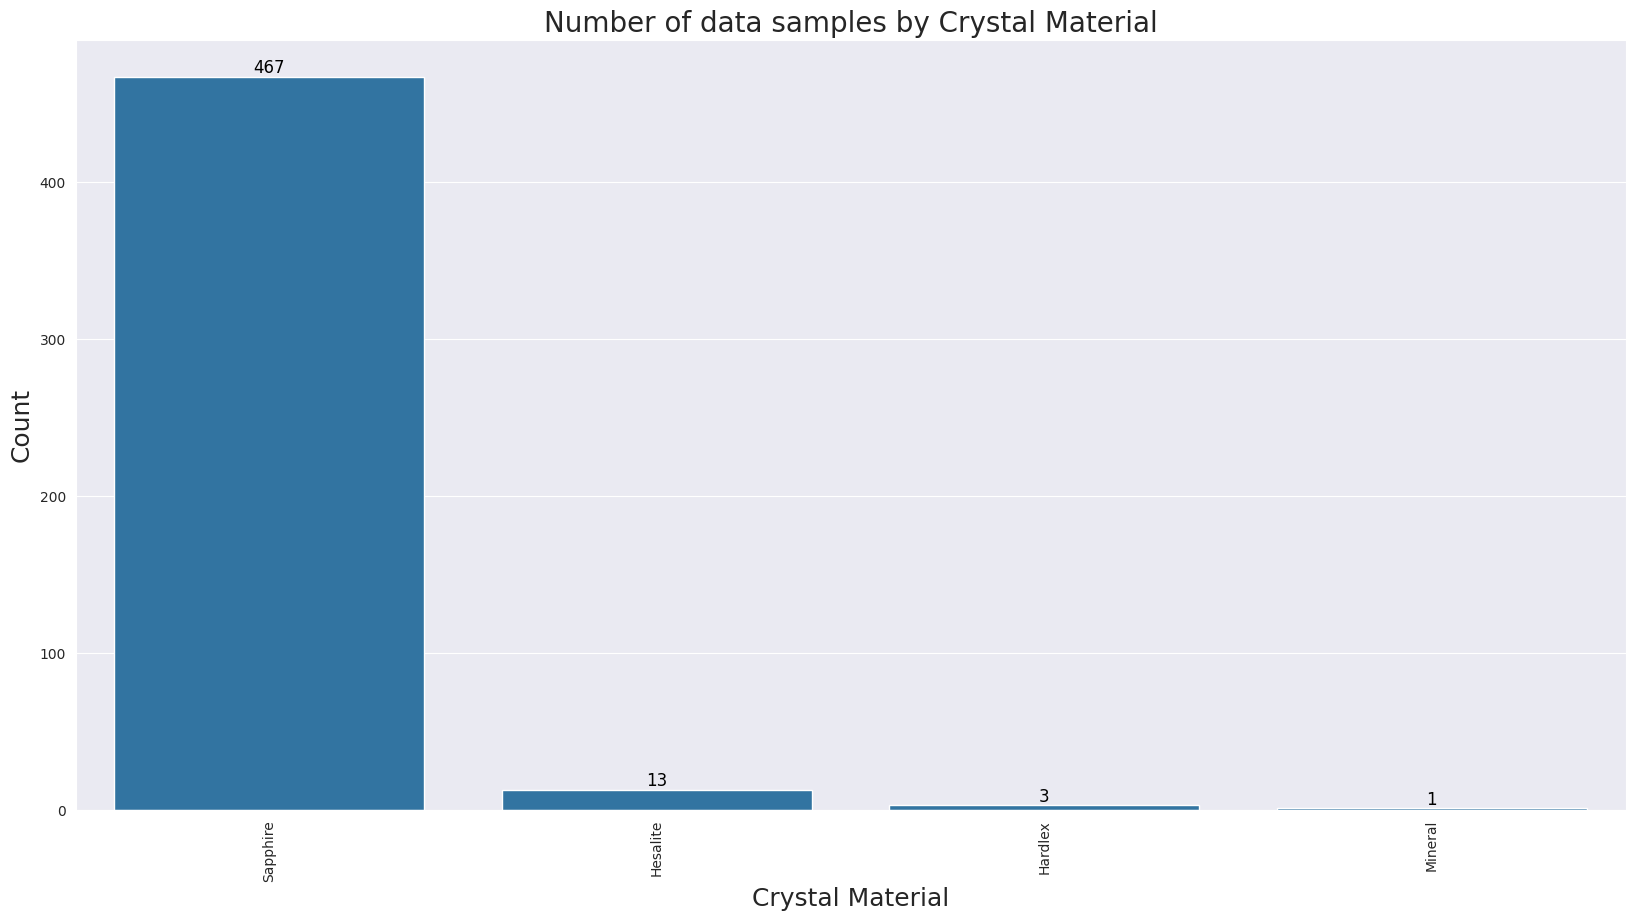

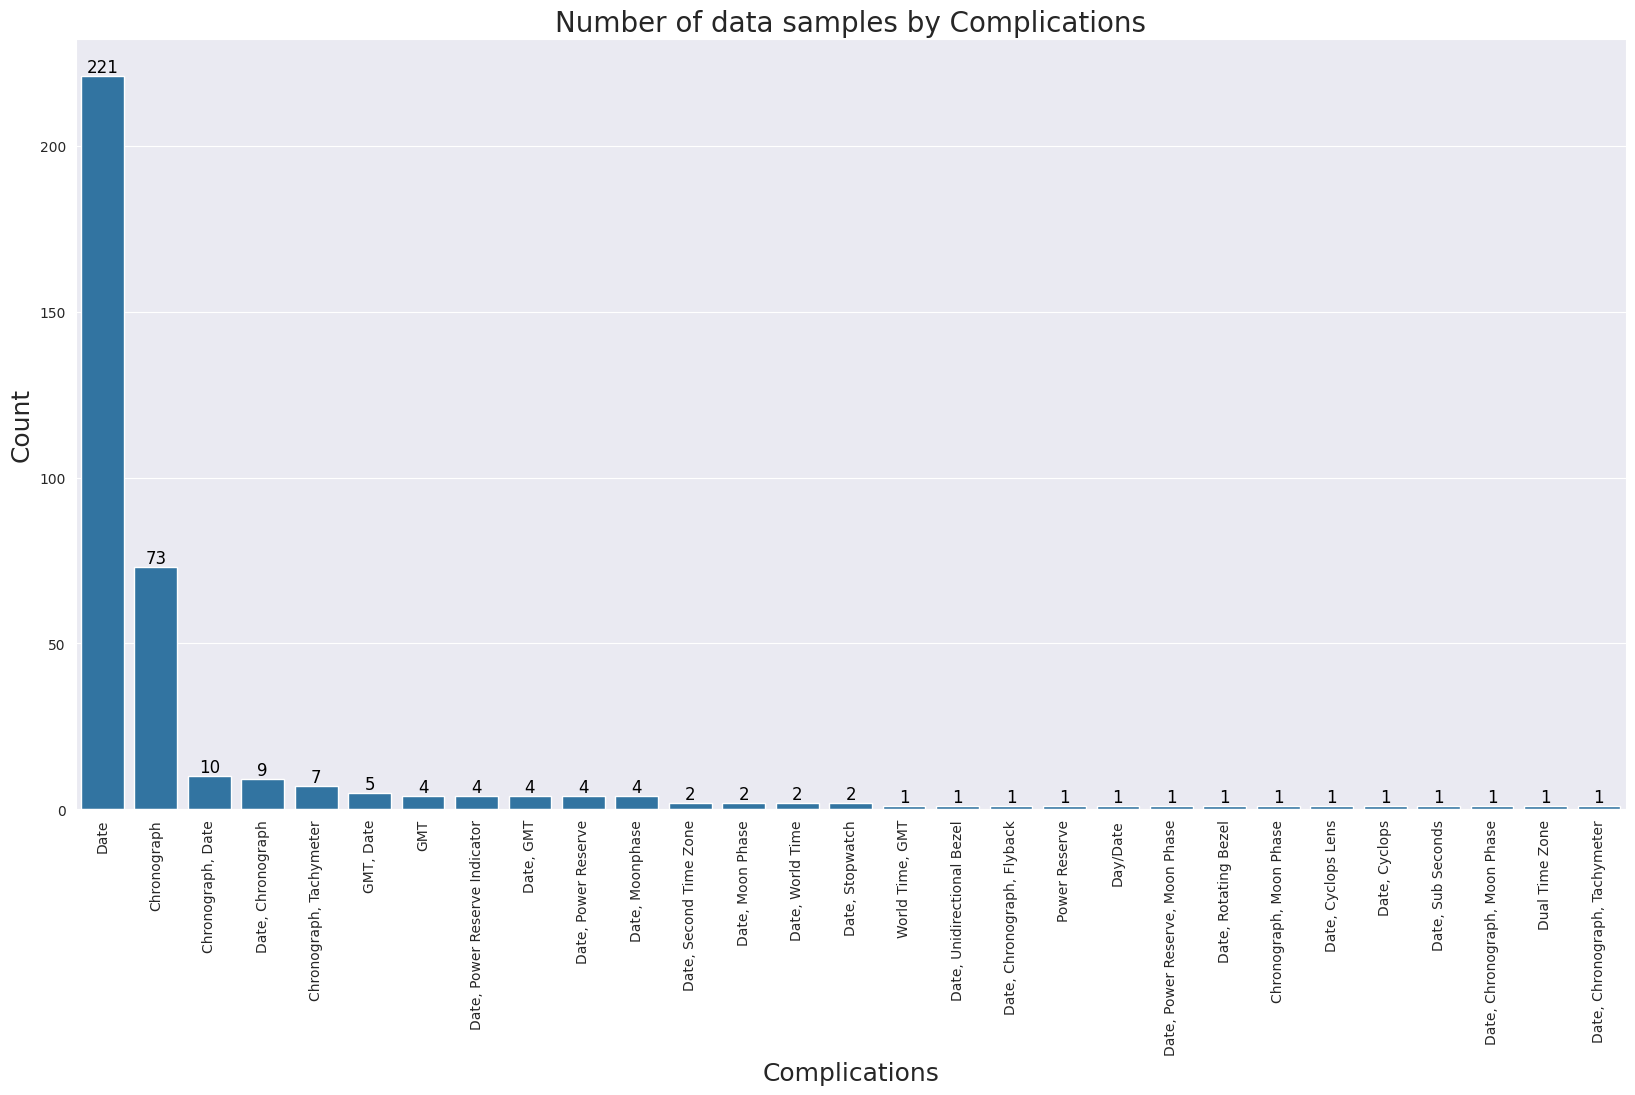

In [6]:
for num,i in enumerate(catcols,1):
    plt.figure(figsize=(20, 10))
    ax = sns.countplot(x=df[i],data=df,order=df[i].value_counts().index)
    plt.xticks(rotation=90)
    for p in ax.patches:
        ax.text(p.get_x() + p.get_width() / 2., p.get_height(), '%d' % int(p.get_height()),
            fontsize=12, color='black', ha='center', va='bottom')
    # plt.subplots_adjust(left=0.1, right=0.9, bottom=0.1, top=0.9, wspace = 0)
    plt.xlabel(catcols[num-1],fontsize=18)
    plt.ylabel("Count",fontsize=18)
    plt.title(f"Number of data samples by {catcols[num-1]}", fontsize=20)
    plt.savefig(f"../webapp/static/img/categorical_data_{num}.png",  bbox_inches='tight', transparent=True)
    plt.show()

### Numerical data

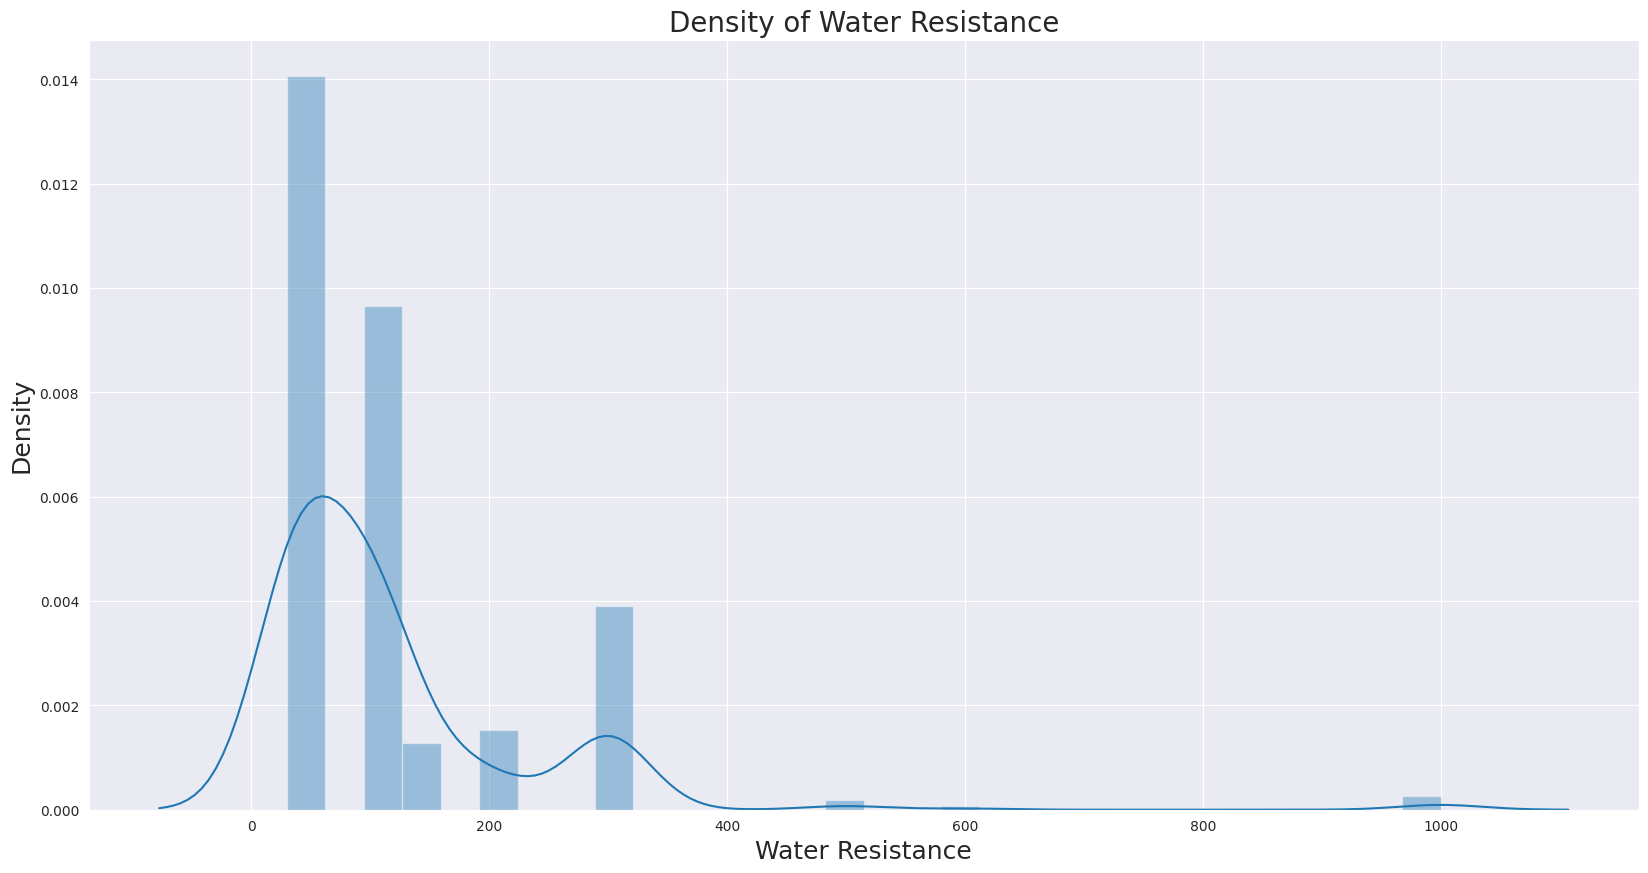

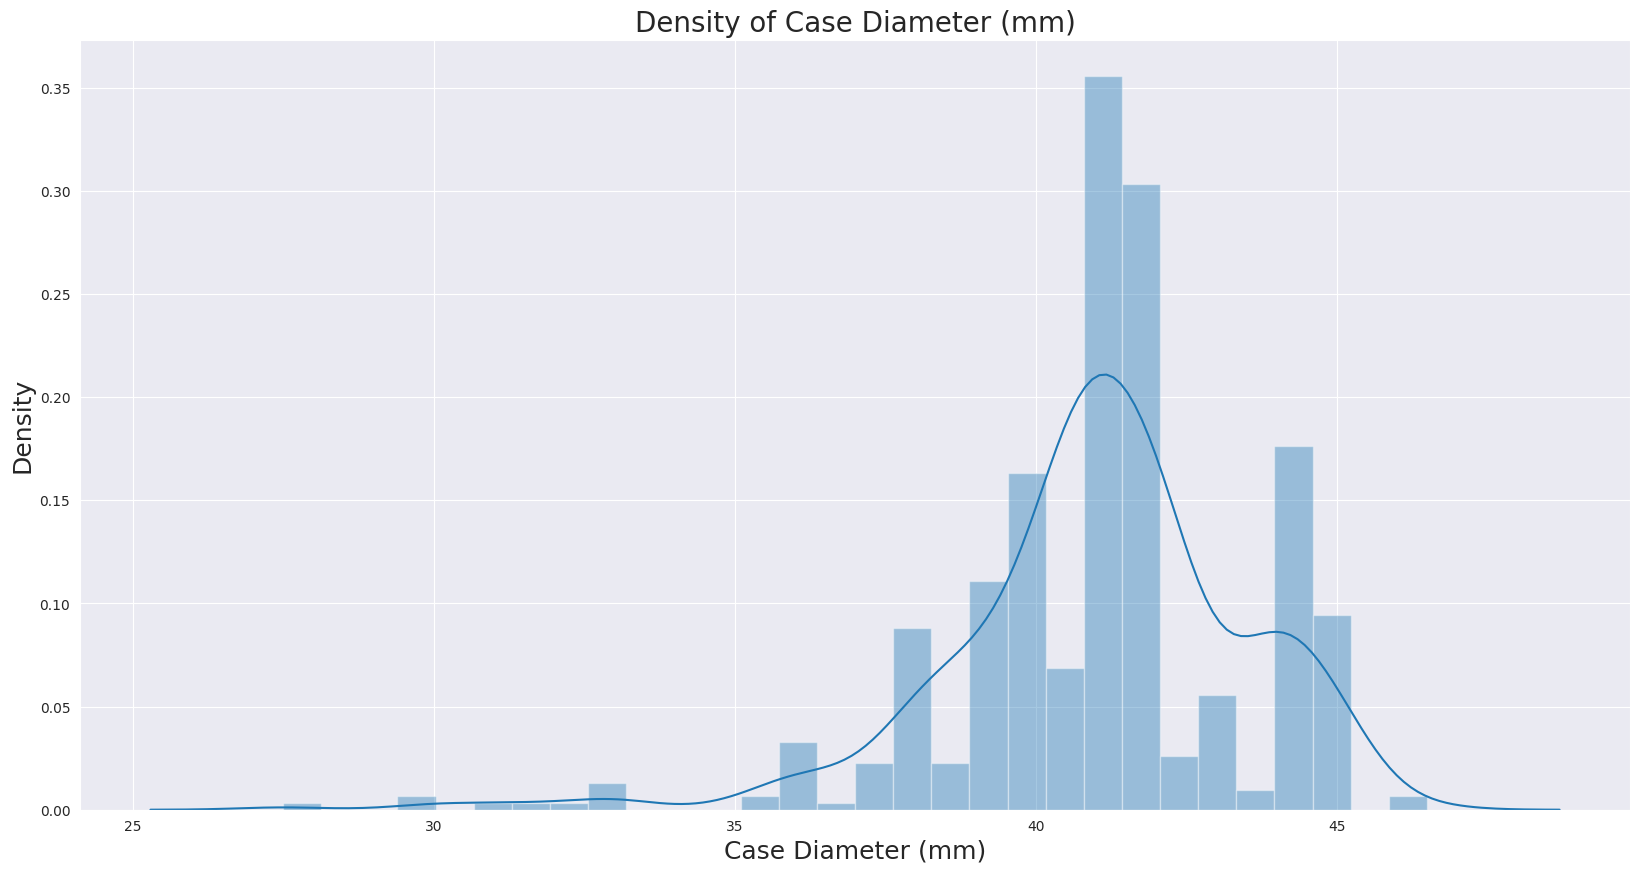

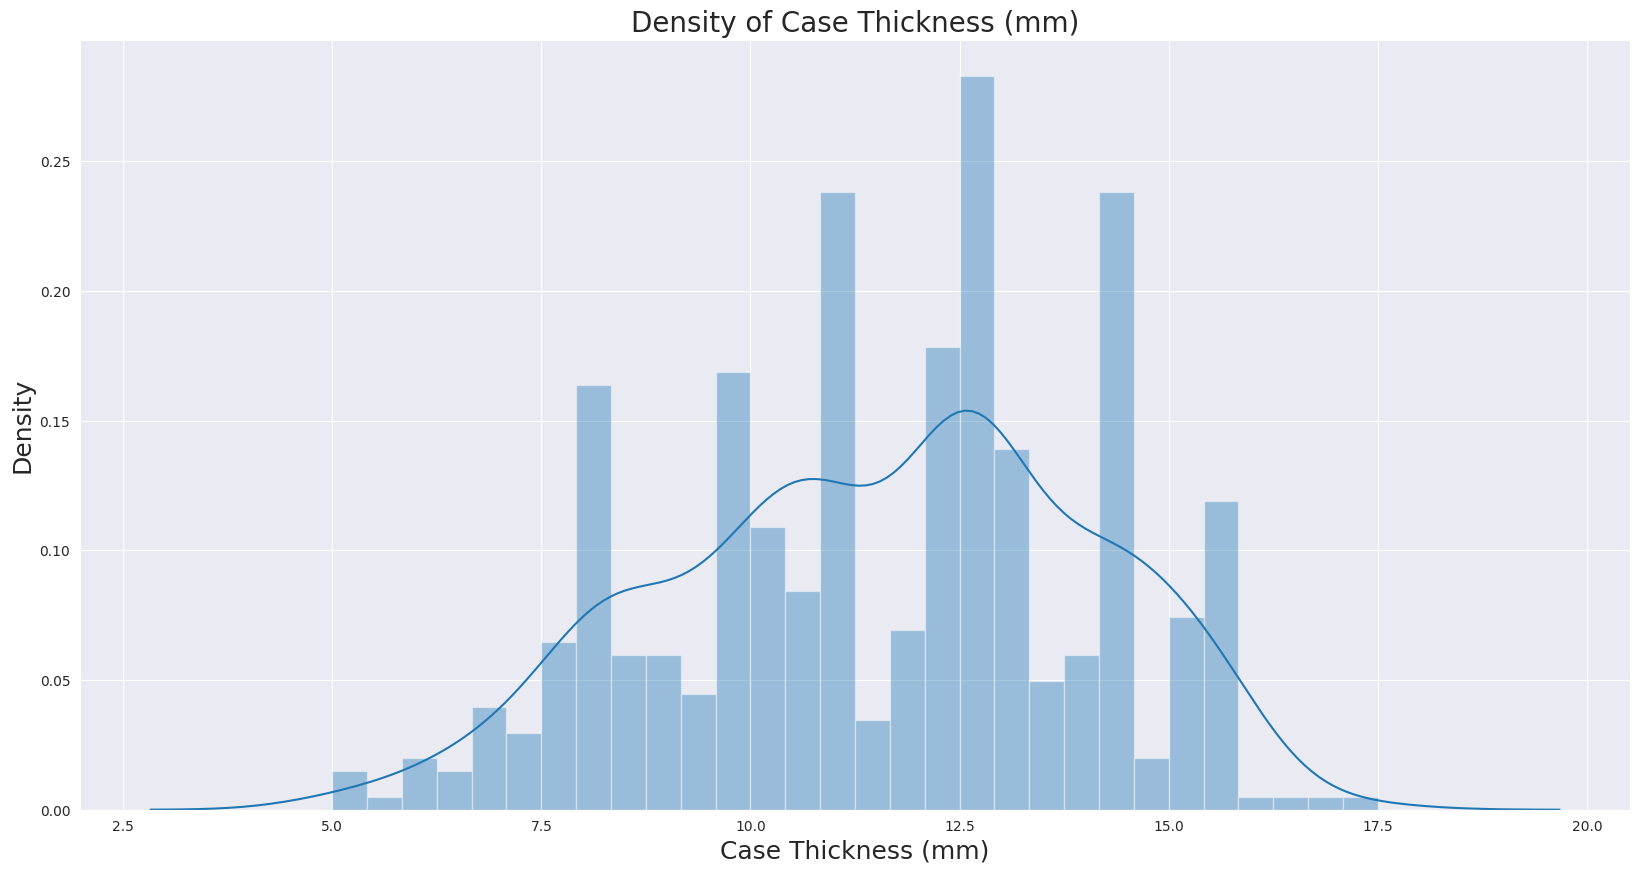

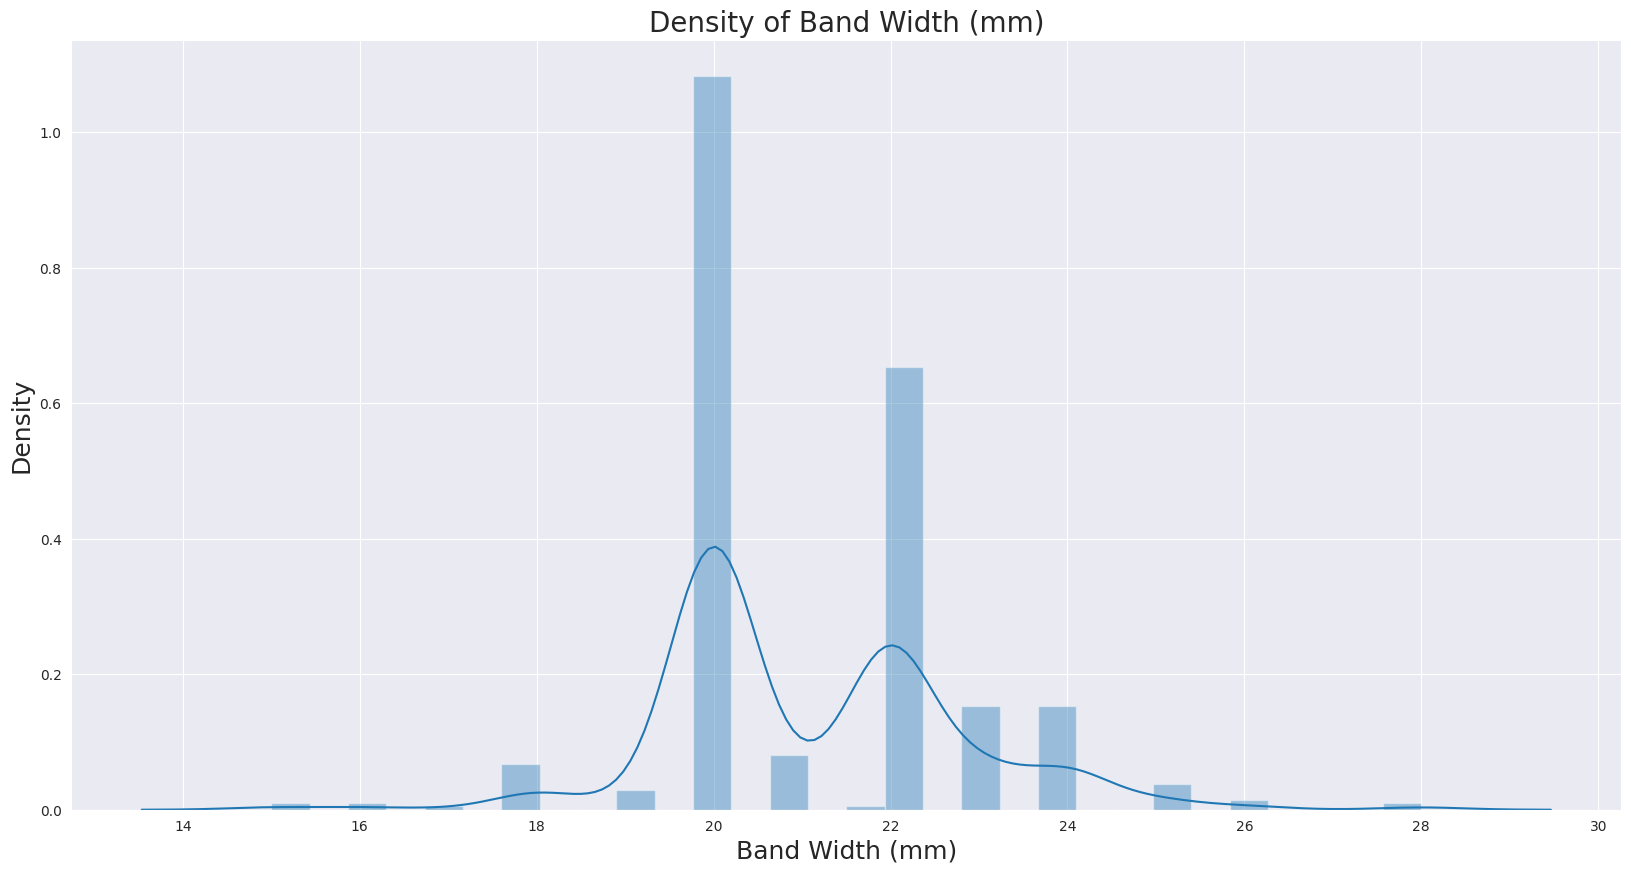

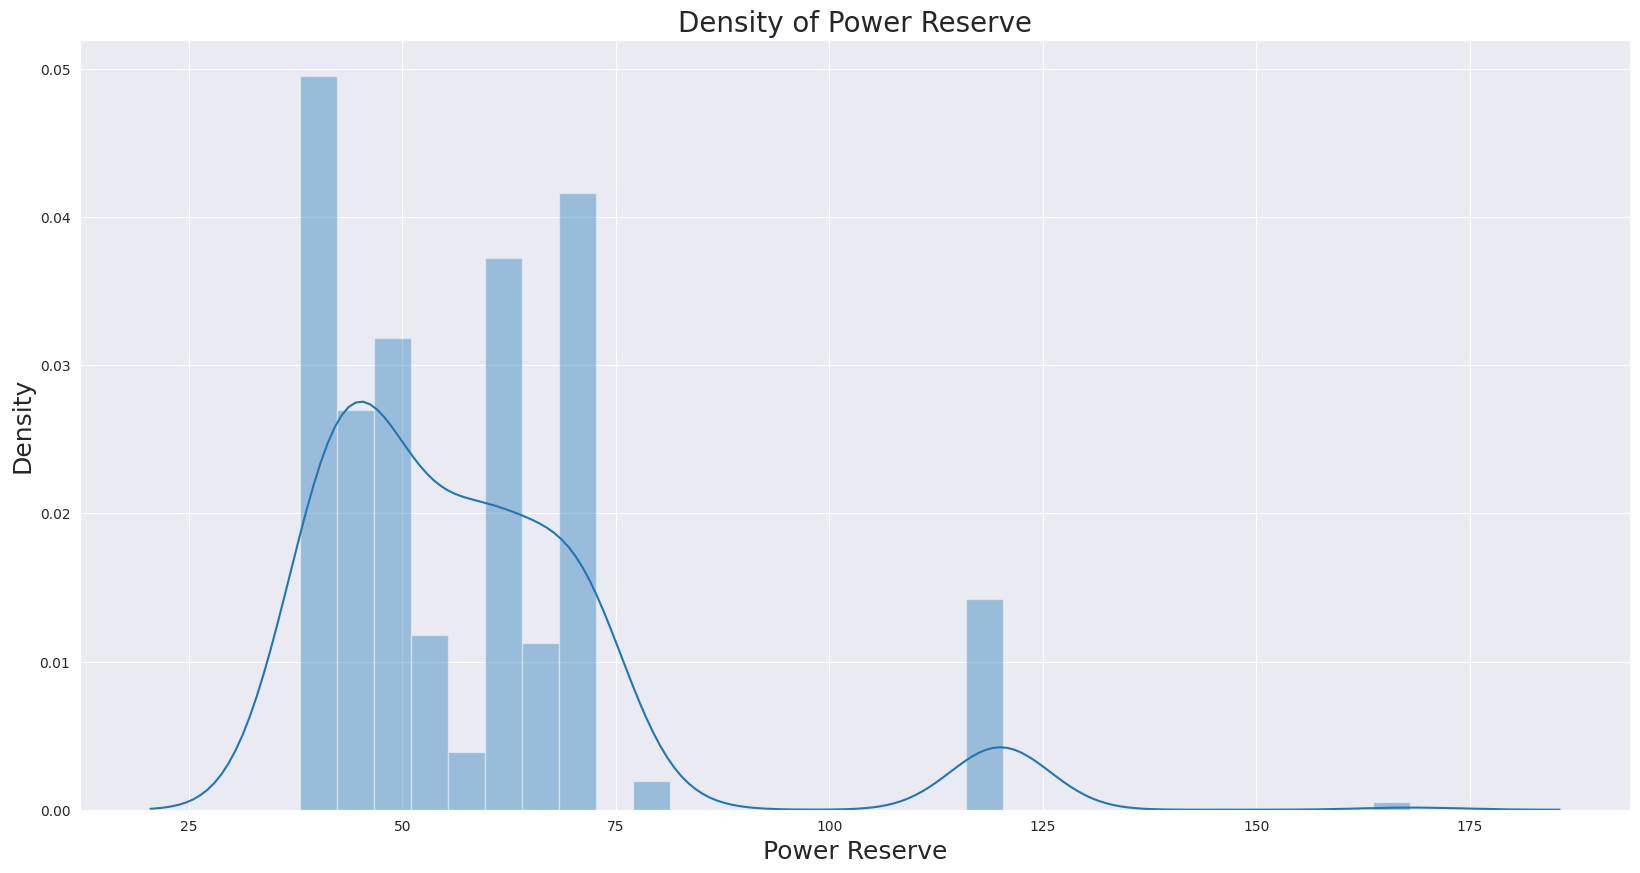

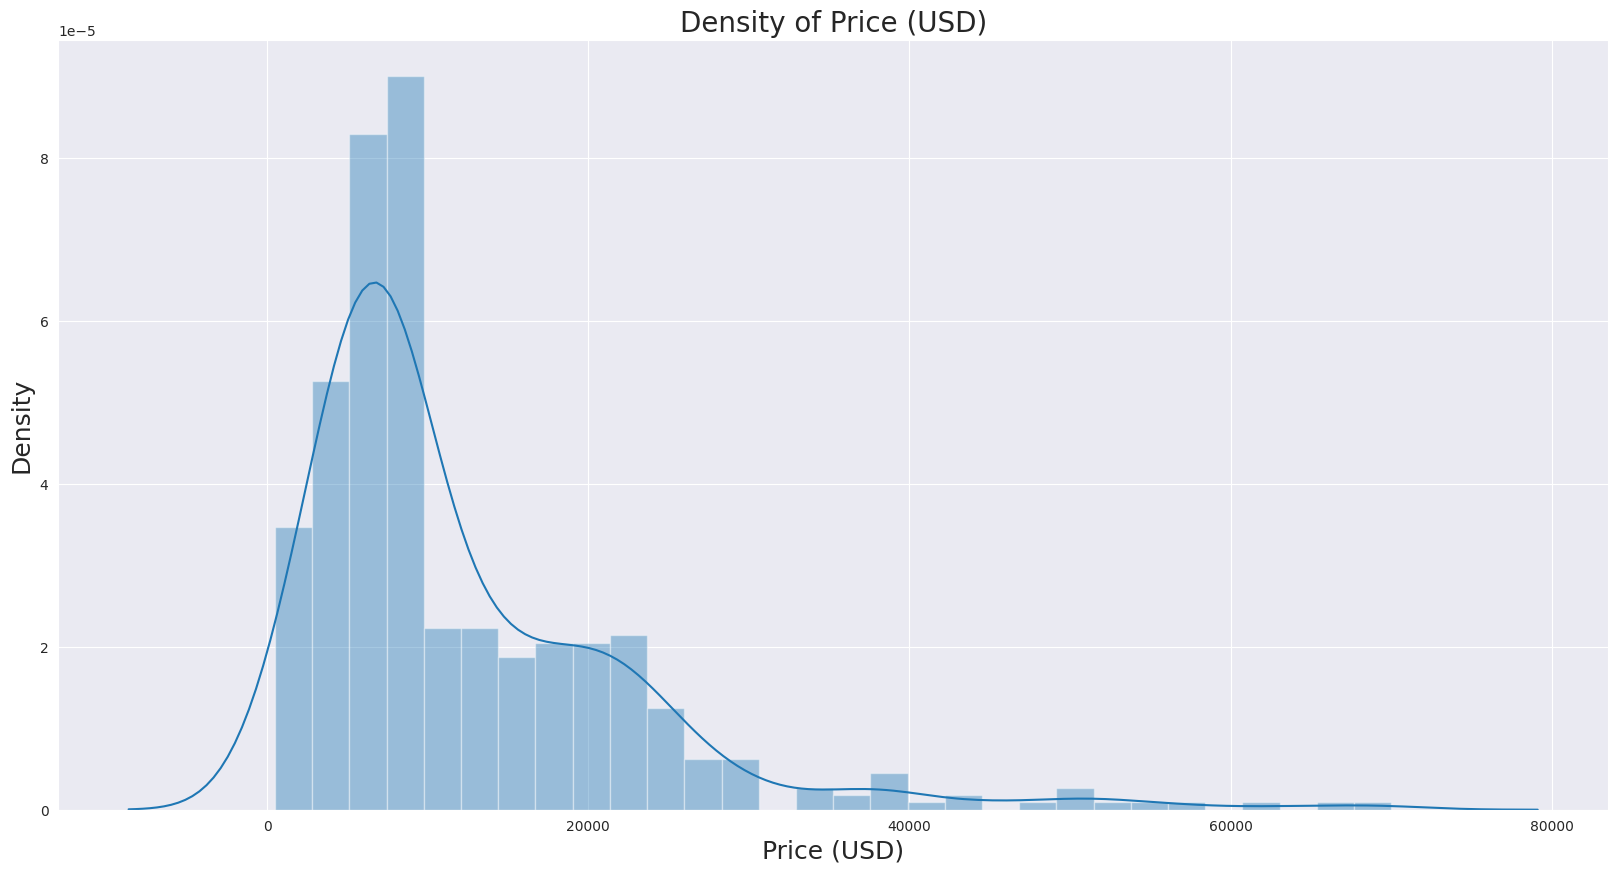

In [7]:
for num,i in enumerate(numcols,1):
    plt.figure(figsize=(20, 10))
    ax = sns.distplot(df[i],bins=30)
    plt.xlabel(numcols[num-1],fontsize=18)
    plt.ylabel("Density",fontsize=18)
    plt.title(f"Density of {numcols[num-1]}", fontsize=20)
    plt.savefig(f"../webapp/static/img/numerical_data_{num}.png",  bbox_inches='tight', transparent=True)
    plt.show()

### Outliers

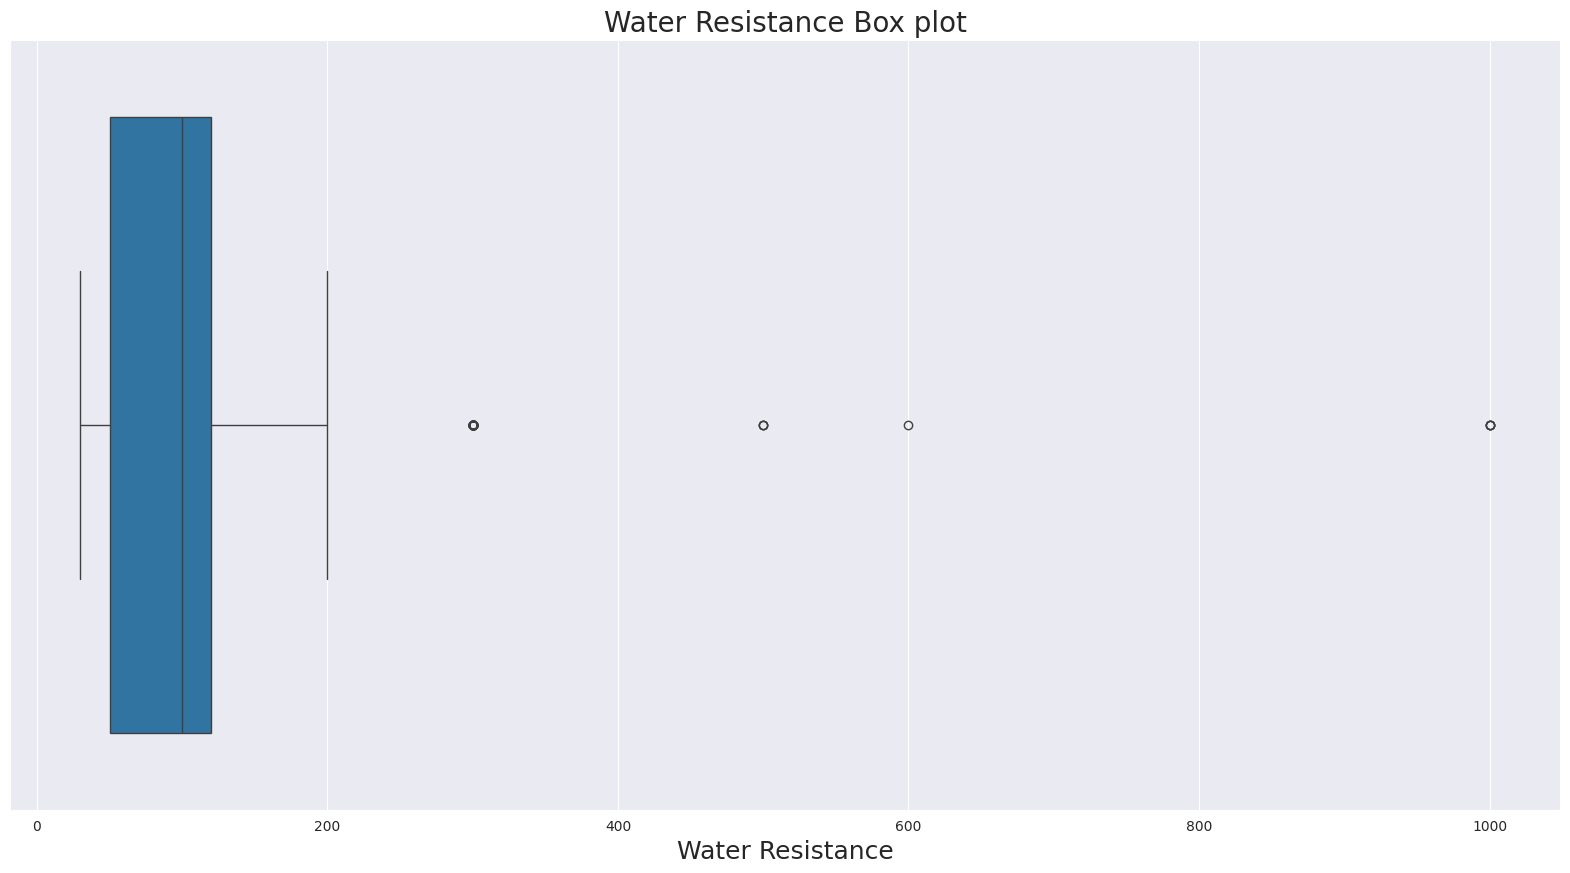

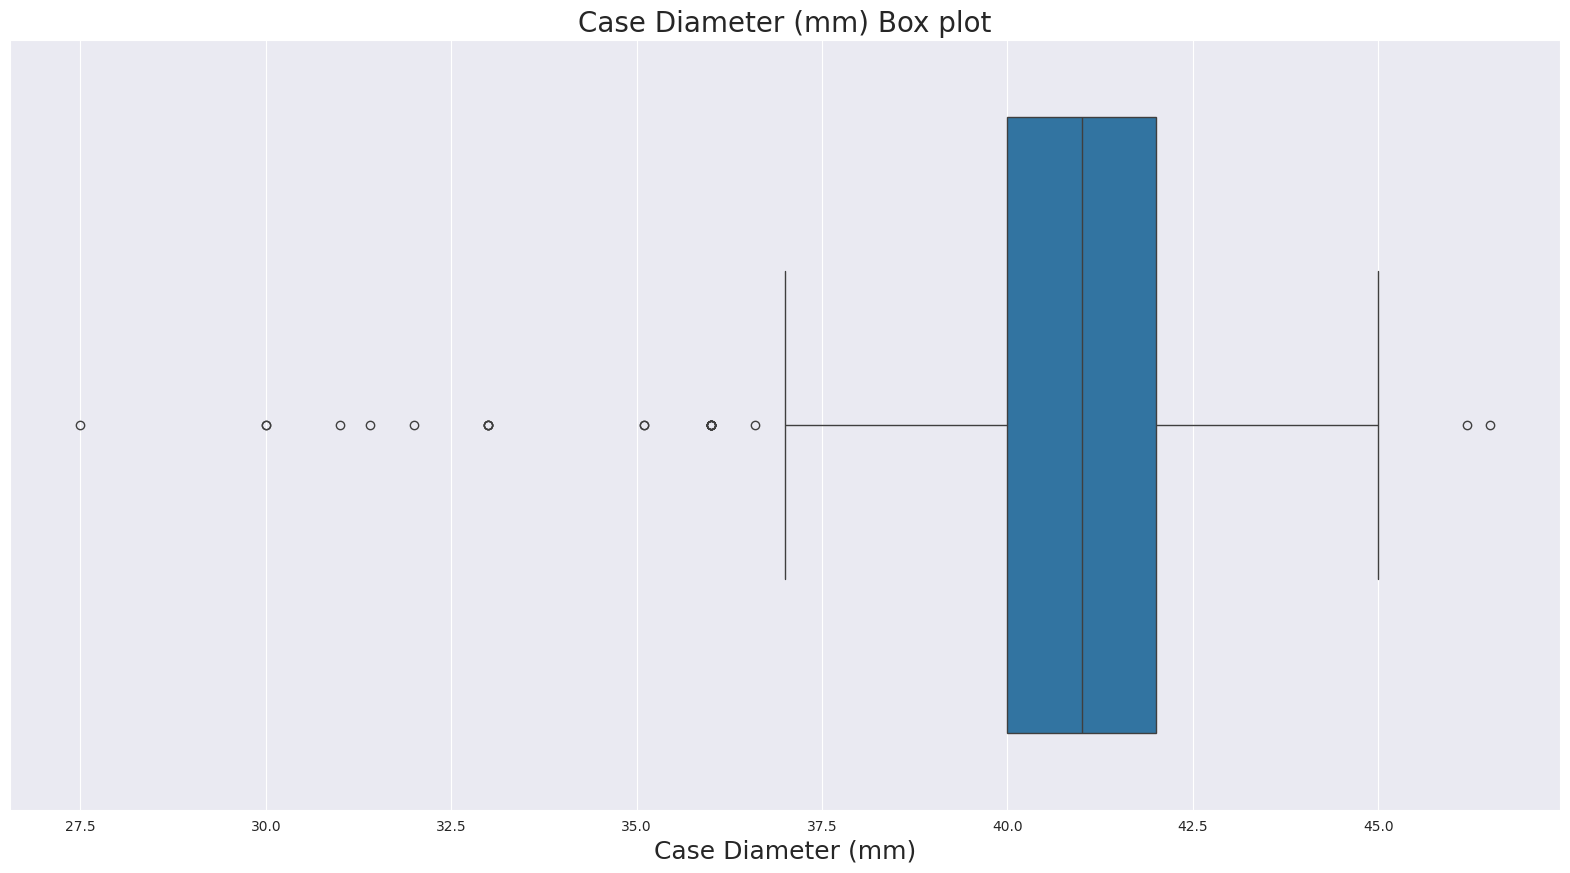

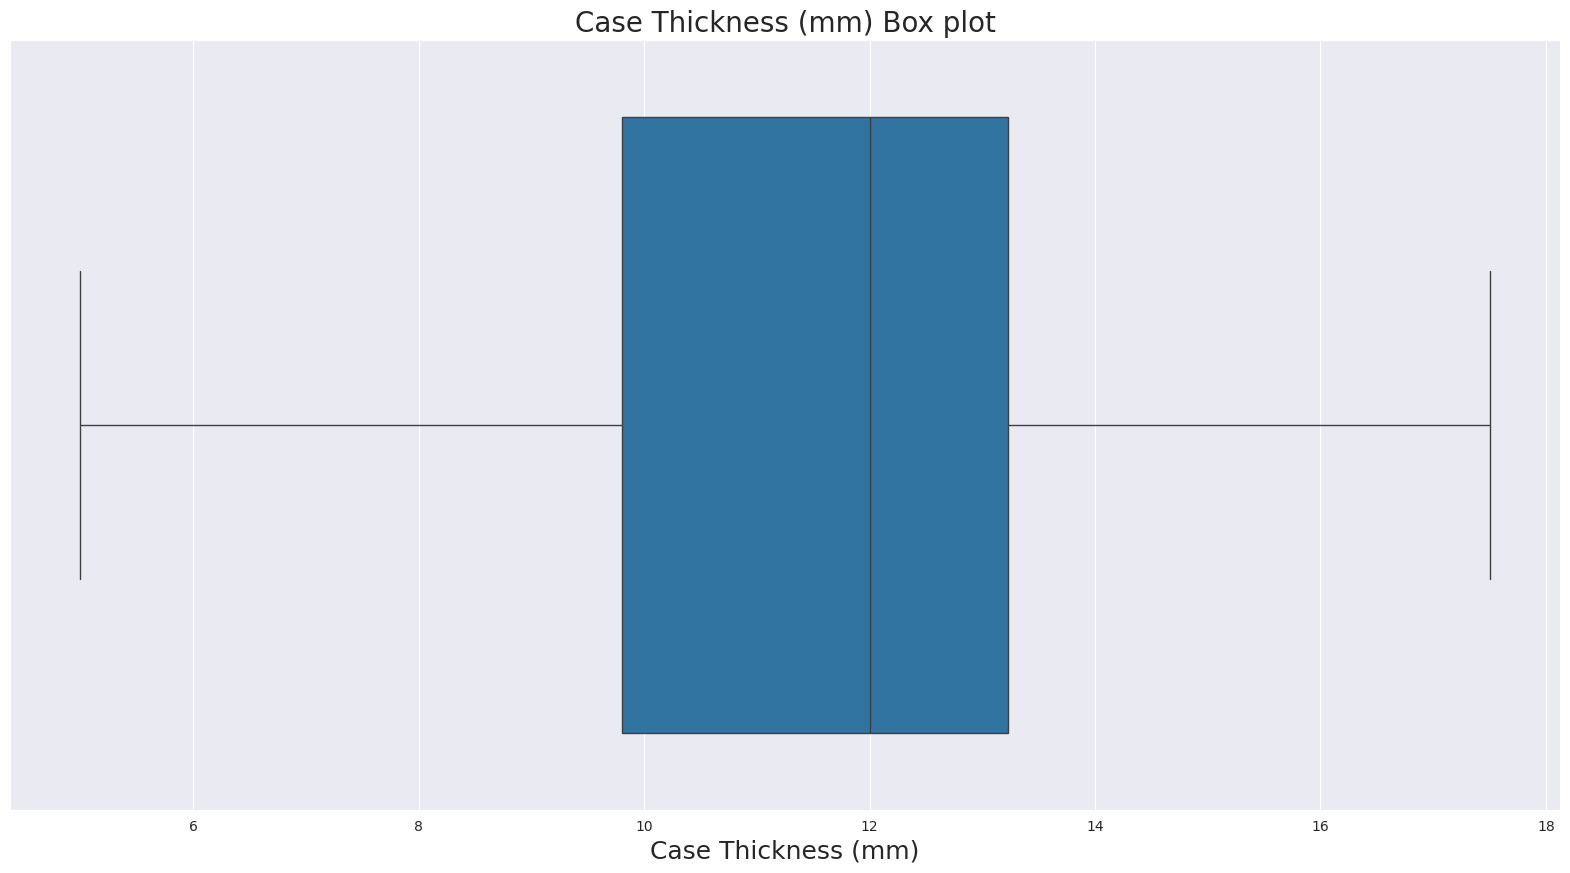

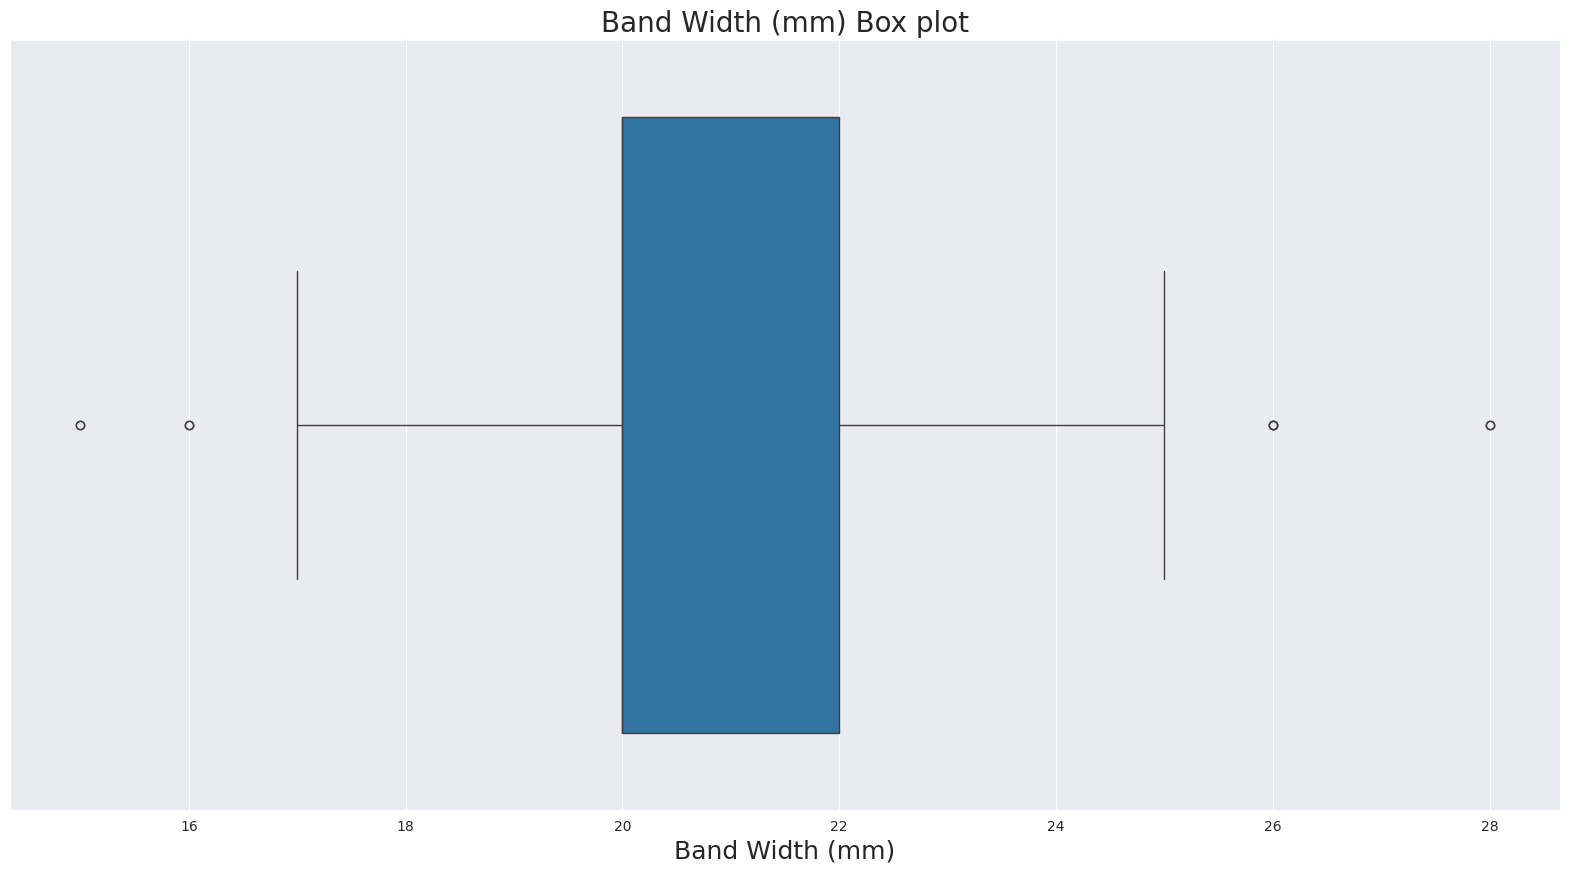

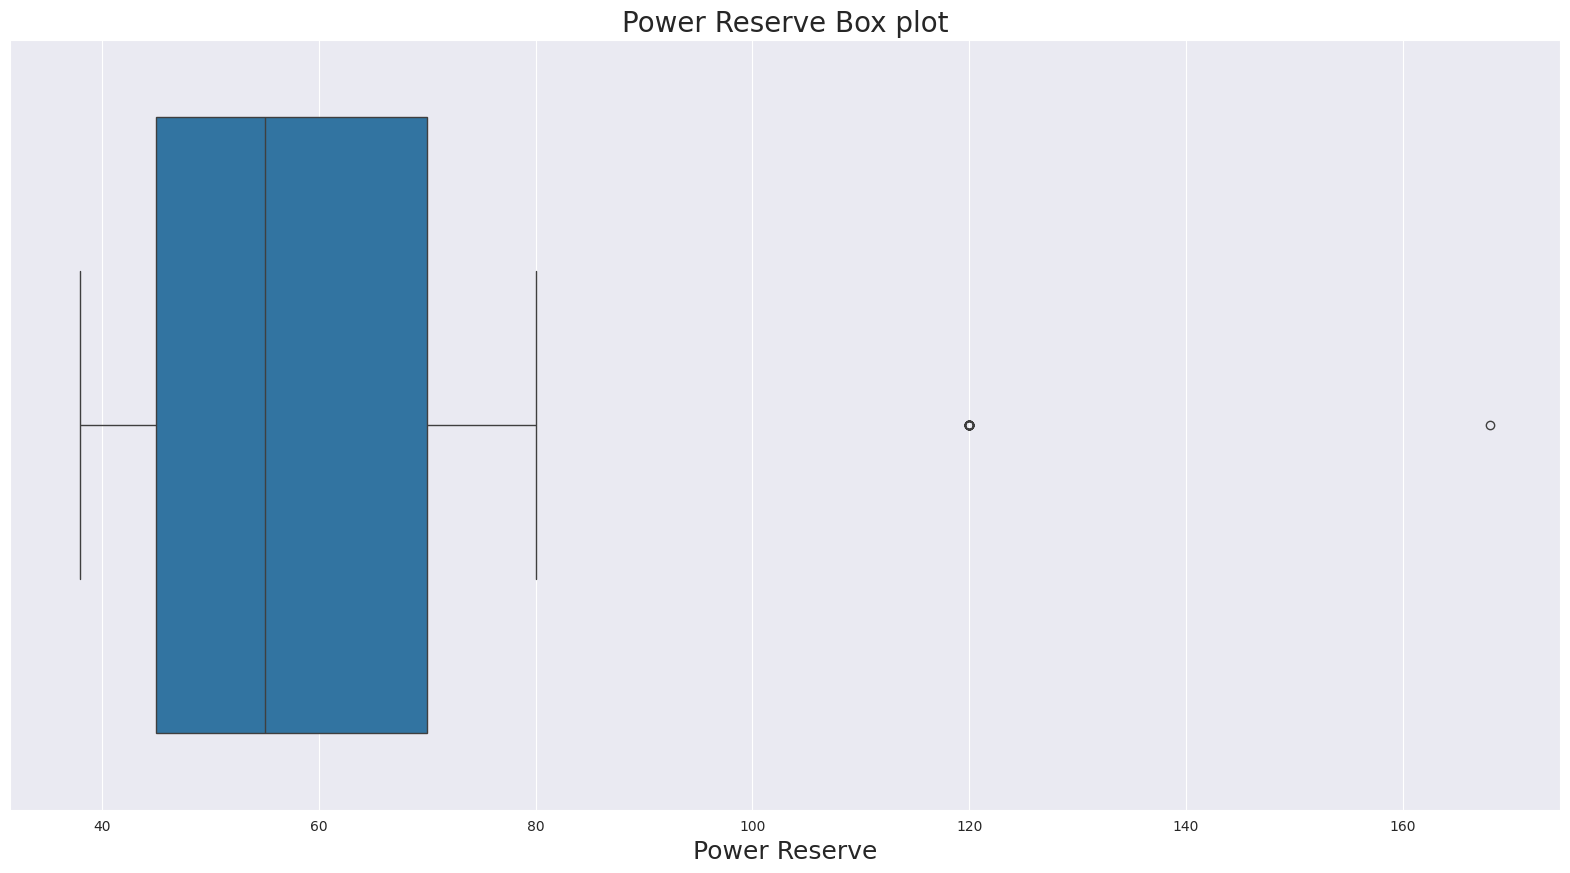

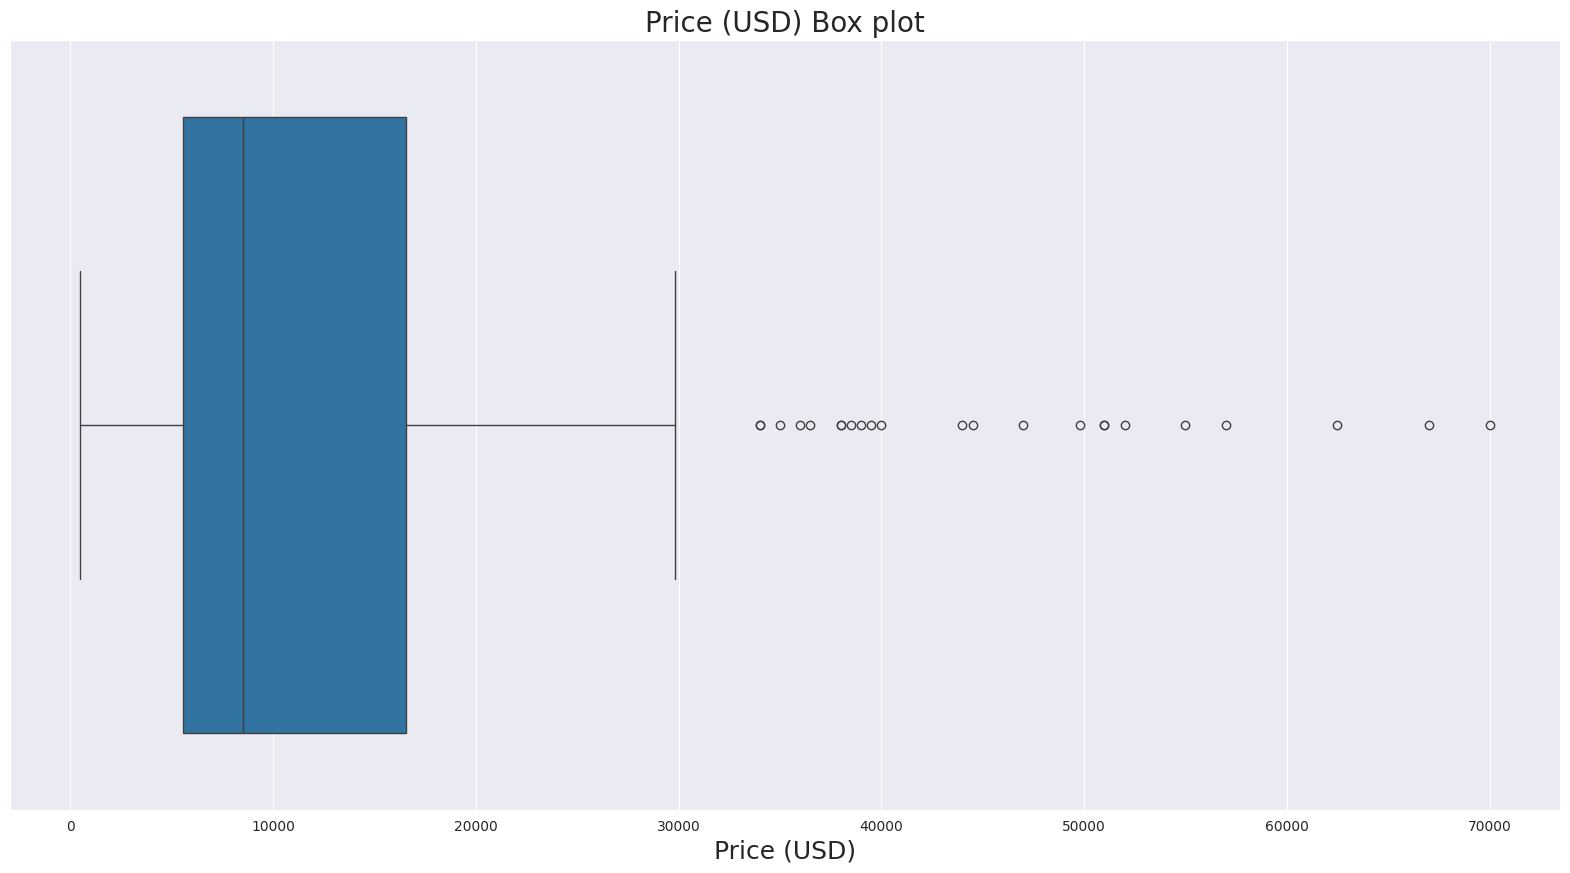

In [8]:
for num,i in enumerate(numcols,1):
    plt.figure(figsize=(20, 10))
    ax = sns.boxplot(x=df[i])
    plt.xlabel(numcols[num-1],fontsize=18)
    plt.title(f"{numcols[num-1]} Box plot", fontsize=20)
    plt.savefig(f"../webapp/static/img/numerical_data_outliers_{num}.png",  bbox_inches='tight', transparent=True)
    plt.show()

### Correlation

In [9]:
df[numcols].corr()

,Water Resistance,Case Diameter (mm),Case Thickness (mm),Band Width (mm),Power Reserve,Price (USD)
Water Resistance,1.000000,0.400385,0.440155,0.277960,0.266559,-0.128394
Case Diameter (mm),0.400385,1.000000,0.604975,0.637900,0.374948,-0.085388
Case Thickness (mm),0.440155,0.604975,1.000000,0.419951,0.385691,-0.403755
Band Width (mm),0.277960,0.637900,0.419951,1.000000,0.317501,-0.086190
Power Reserve,0.266559,0.374948,0.385691,0.317501,1.000000,-0.005273
Price (USD),-0.128394,-0.085388,-0.403755,-0.086190,-0.005273,1.000000


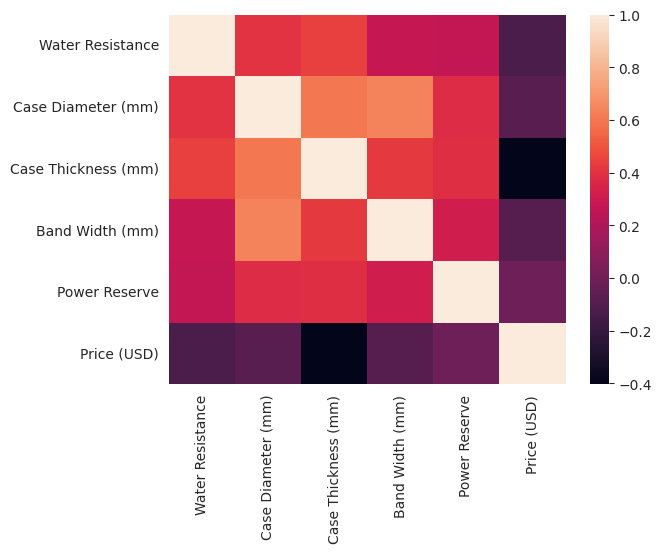

In [10]:
sns.heatmap(df[numcols].corr())
plt.savefig(f"../webapp/static/img/numerical_data_correlation.png",  bbox_inches='tight', transparent=True)